# Courbure Minimale

In [128]:
## import des librairies utilisées
import numpy as np
import matplotlib.pyplot as plt


## 1 Courbes de Bézier

#### 1. On fixe $A_0 = (-1, 0)$ et $A_n = (1, 0)$. Représenter plusieurs courbes de Bézier avec $n = 2, 3, 4$ et différents choix de points de contrôle afin de comprendre leur rôle pour la forme de la courbe.


In [129]:
def fact(n):    # factorielle de n
    if n == 0:
        return 1
    else:
        return n * fact(n - 1)

def k_parmi_n(n, k):    # combinaison de k parmi n
    return fact(n) / (fact(k) * fact(n - k))

def x(t, A):    # coordonnée x(t) en fonction du point de contrôle A_i
    S = 0
    n = len(A) - 1
    for i in range(n + 1):
        S += k_parmi_n(n, i) * (t ** i) * ((1 - t) ** (n - i)) * A[i][0]
    return S

def z(t, A):    # coordonnée z(t) en fonction du point de contrôle A_i
    S = 0
    n = len(A) - 1
    for i in range(n + 1):
        S += k_parmi_n(n, i) * (t ** i) * ((1 - t) ** (n - i)) * A[i][1]
    return S

def X(Aliste):  # liste des valeurs de x(t) pour t allant de 0 à 1 avec un pas de 0.01
    X = []
    for i in range(101): 
        t = i / 100
        X.append(x(t, Aliste))
    return X

def Z(Aliste):  # liste des valeurs de z(t) pour t allant de 0 à 1 avec un pas de 0.01
    Z = []
    for i in range(101):
        t = i / 100 
        Z.append(z(t, Aliste))
    return Z

def gamma(A):   # fonction gamma(x, z) pour une liste de points de contrôle A
    X_vals = X(A)
    Z_vals = Z(A)
    gamma = np.zeros((len(X_vals), 2))
    for i in range(len(X_vals)):
        gamma[i][0] = X_vals[i]
        gamma[i][1] = Z_vals[i]
    return gamma

-   $n = 2$ ; les points de contrôle sont : $A_0 = (-1,0)$, $A_1= (0.5,0.3)$, $A_2 = (1,0)$

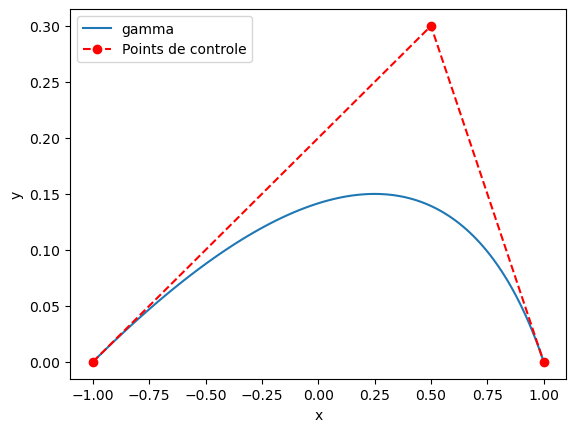

In [130]:
A = [[-1,0],[0.5,0.3],[1,0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
A2 = np.array(A)
plt.plot(A2[:,0],A2[:,1],'ro--', label='Points de controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


-   $n = 3$ ; les points de contrôle sont : $A_0 = (-1,0)$, $A_1= (0,0.3)$, $A_2 = (0.6,-0.6)$, $A_3 = (1,0)$

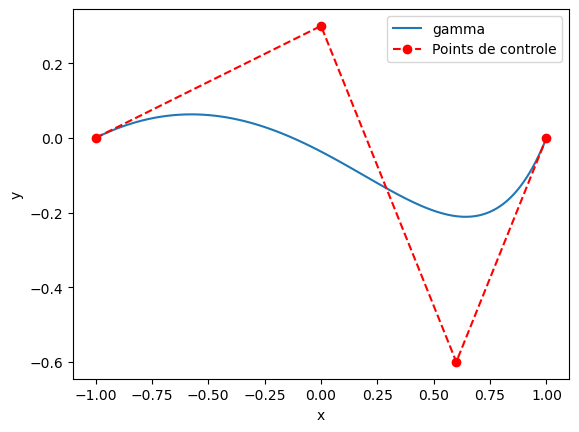

In [131]:
A = [[-1,0],[0,0.3],[0.6,-0.6],[1,0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
A2 = np.array(A)
plt.plot(A2[:,0],A2[:,1],'ro--', label='Points de controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

-   $n = 4$ ; les points de contrôle sont : $A_0 = (-1,0)$, $A_1= (-0.2,0.1)$, $A_2 = (-0.15,0.7)$, $A_3 = (0.5,-0.9)$, $A_4 = (1,0)$

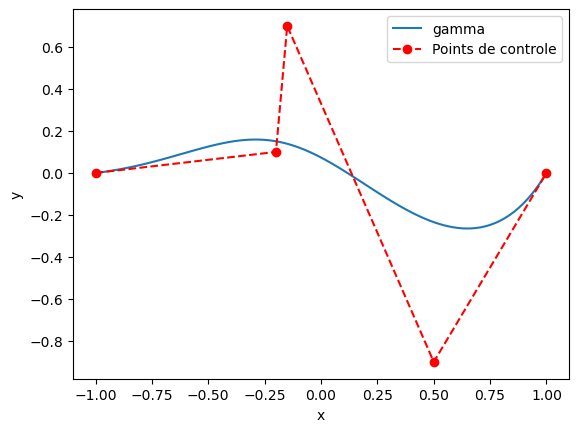

In [132]:
A = [[-1,0],[-0.2,0.1],[-0.15,0.7],[0.5,-0.9],[1,0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
A2 = np.array(A)
plt.plot(A2[:,0],A2[:,1],'ro--', label='Points de controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### 2. Les pentes initiales et finales sont fixées : $p_0$ en $A_0$ et $p_n$ en $A_n$. Déterminer les conditions sur les points de contrôle permettant de satisfaire ces conditions.

Par une lecture graphique, il semblerait que la pente $p_0$ soit égale à celle de la droite reliant $A_0$ et $A_1$. 

Ainsi, le point de contrôle $A_1 = (x_1, y_1)$ doit satisfaire :

$$
p_0 = \frac{y_1 - y_0}{x_1 - x_0}
$$

De la même manière, pour la pente finale $p_n$, le point de contrôle $A_{n-1} = (x_{n-1}, y_{n-1})$ doit satisfaire :

$$
p_n = \frac{y_n - y_{n-1}}{x_n - x_{n-1}}
$$

Les points de contrôle $A_1$ et $A_{n-1}$ doivent donc se situer respectivement sur les droites suivantes :

- Pour $A_1$ : $y = -p_0(x_0 - x_{1}) + y_0$
- Pour $A_{n-1}$ : $y = -p_n(x_n - x_{n-1}) + y_n$

Ces conditions montrent que les pentes initiales et finales dépendent uniquement des points de contrôle $A_1$ et $A_{n-1}$. 


#### 3. Représenter des courbes de Bézier satisfaisant $p_0 = 1$ et $p_n = -1$. Idem avec $p_0 = 0$ et $p_n = -2$.

##### 1.    Soient $p_0 = 1$ et $p_n = -1$

On fixe $A_0 = (−1, 0)$ et $A_n = (1, 0)$. <br>
Ainsi d'après la question précédente on doit fixer le points de contrôles $A_1$ et $A_{n-1}$ de la maniere suivante :
$$A_1 = (x_1, 1+x_1) \quad et \quad A_{n-1} = (x_{n-1}, 1-x_{n-1})$$

On peut alors tracer les courbes de Bézier suivantes :

- Pour n = 2 seul le point de controle $A_1 = (0,1)$ satisfait $p_0 = 1$ et $p_n = -1$.
- A partir de n=3 une infinité de valeur de de $A_1$ et $A_{n-1}$ conviennent pour $p_0 = 1$ et $p_n = -1$.

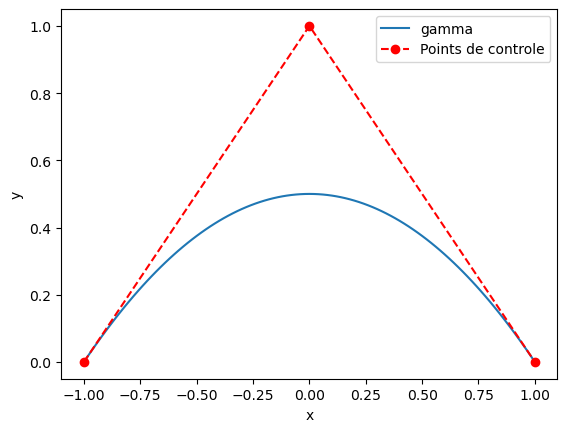

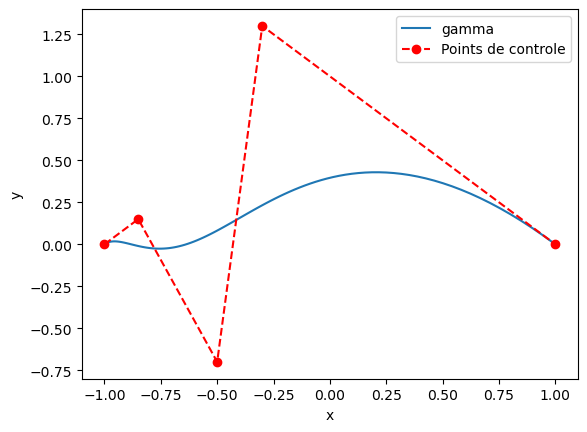

In [133]:
A = [[-1,0],[0,1],[1,0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
A2 = np.array(A)
plt.plot(A2[:,0],A2[:,1],'ro--', label='Points de controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
A = [[-1,0],[-0.85,0.15],[-0.5,-0.7],[-0.3, 1.3],[1,0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
A2 = np.array(A)
plt.plot(A2[:,0],A2[:,1],'ro--', label='Points de controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### 2.    Soient $p_0 = 0$ et $p_n = -2$

On fixe $A_0 = (−1, 0)$ et $A_n = (1, 0)$. <br>
Ainsi d'après la question précédente on doit fixer le points de contrôles $A_1$ et $A_{n-1}$ de la maniere suivante :
$$A_1 = (x_1, 0) \quad et \quad A_{n-1} = (x_{n-1}, 2-2x_{n-1})$$

- Pour n = 2 aucun point de controle $A_1$ satisfait $p_0 = 0$ et $p_n = -2$.
- A partir de n=3 une infinité de valeur de de $A_1$ et $A_{n-1}$ conviennent pour $p_0 = 0$ et $p_n = -2$.

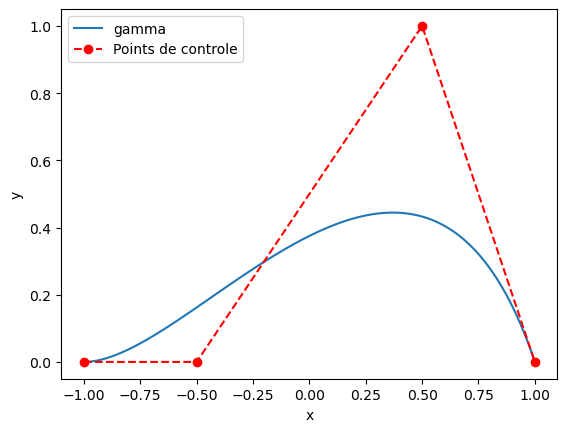

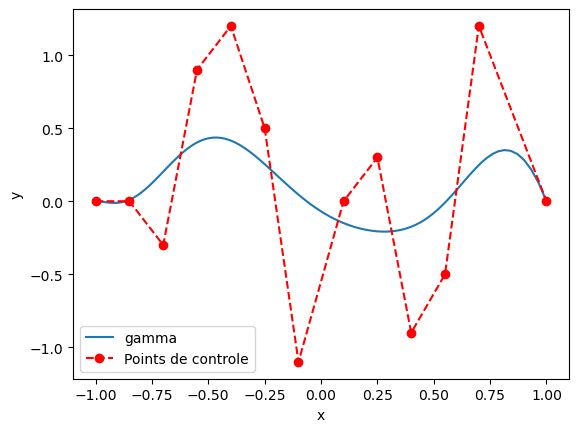

In [134]:
A = [[-1, 0], [-0.5, 0], [0.5, 1], [1, 0]]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
A2 = np.array(A)
plt.plot(A2[:,0],A2[:,1],'ro--', label='Points de controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
A = [
    [-1, 0],
    [-0.85, 0],
    [-0.7, -0.3],
    [-0.55, 0.9],
    [-0.4, 1.2],
    [-0.25, 0.5],
    [-0.1, -1.1],
    [0.1, 0],
    [0.25, 0.3],
    [0.4, -0.9],
    [0.55, -0.5],
    [0.7, 1.2],
    [1, 0]
]
GAMMA1=gamma(A)
GAMMA1=np.array(GAMMA1)
plt.plot(GAMMA1[:,0],GAMMA1[:,1], label='gamma')
A2 = np.array(A)
plt.plot(A2[:,0],A2[:,1],'ro--', label='Points de controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### 4. La longueur de nos courbes de Bézier est donnée par $L(\gamma) = \int_0^1 \sqrt{x'(t)^2 + y'(t)^2} dt$. Déterminer (au moins approximativement) et représenter des courbes de Bézier (avec les mêmes extrémités que précédemment) de longueurs 3 et 4.


Revoir/finir le code ci-desous

In [ ]:
def longueur(gamma, pas):  # longueur de gamma
    L = 0
    for i in range(len(gamma) - 1):
        L += L + np.sqrt((gamma[i + 1][0] - gamma[i][0])/(len(gamma)) ** 2 + (gamma[i + 1][1] - gamma[i][1]) ** 2)
        
        L += np.sqrt((gamma[i + 1][0] - gamma[i][0]) ** 2 + (gamma[i + 1][1] - gamma[i][1]) ** 2)
        
    L = L * ((gamma[0][0] - gamma[len(gamma)][0])/(len(gamma)))
    return L

def pente(x1, x2, y1, y2):  # pente entre deux points(approximation de la dérivée)
    return (y2 - y1) / (x2 - x1)

## 2 Courbe de courbure minimale

1. Écrire un programme qui, pour des fonctions $x$ et $y$ et un paramètre $t$, calcule la courbure de la courbe correspondante en $t$.

2. Écrire un programme qui calcule la courbure maximale d’une courbe paramétrée.

3. Donner plusieurs exemples en repérant graphiquement les points de courbure maximale.

4. Proposer une démarche, basée sur le nombre de points de contrôle et surtout leur position, permettant d’obtenir une courbe qui respecte les contraintes en $A_0$ et $A_n$ et qui minimise la courbure maximale.

5. Recommencer avec des pentes différentes en les deux points.

6. Pourrait-on, si on considérait autre chose que les courbes de Bézier, trouver une solution de courbure maximale aussi petite que voulue ?

7. (Bonus) Ajouter la contrainte de recollements de classe $C^2$ en $A_0$ et $A_n$ et déterminer ainsi de meilleures solutions au problème.

## 3 Courbe élastique

1. Écrire un programme qui calcule la valeur numérique de $K$ d’une courbe donnée.

2. Proposer plusieurs exemples de telles courbes et calculer la valeur de $K$ correspondante.

3. Proposer une procédure, basée sur le nombre de points de contrôle et surtout leur position, qui, à partir d’une courbe donnée avec une certaine valeur de $K$, construit une nouvelle courbe (toujours de longueur approximative égale à 3) dont la valeur de $K$ devrait être inférieure.

4. Utiliser cette procédure pour approcher autant que possible la courbe solution
du problème.

5. Recommencer avec d’autres longueurs $L$.